**A kind request, please upvote if this kernel helps. These scripts are inspired from [Kaggler learning](http://https://www.kaggle.com/learn/overview) posts. **

This section covers follwoing aspects:
* Pandas basic plot functions,
* Basic style functions
* Subplots function
* Pairplot
* Heatplot

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')  

In [2]:
# 시스템 폰트 찾기
import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
    if f.name.find('Gothic') != -1:
        print(f.name)

Hiragino Maru Gothic Pro
NanumGothic
NanumBarunGothic
NanumBarunGothic
AppleGothic
NanumBarunGothic
Noto Sans Gothic
NanumGothic
Apple SD Gothic Neo
NanumGothic
NanumGothic
NanumBarunGothic


In [3]:
# 한글 폰트 설정
from matplotlib import rcParams

rcParams['font.family'] = 'NanumGothic'
rcParams['font.size'] = 10

No handles with labels found to put in legend.


Text(0.5, 1.03, 'Figure Title')

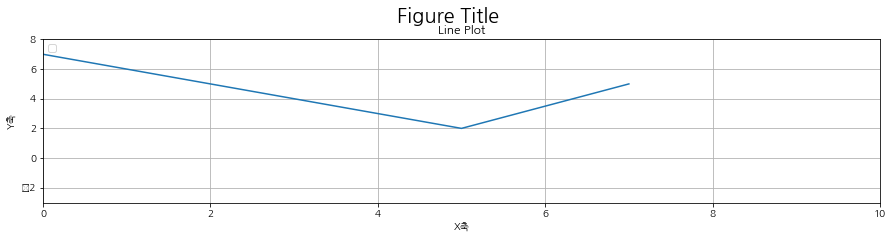

In [4]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize = (15,3))

plt.plot(x, y)

plt.xlim(0 ,10)
plt.ylim(-3, 8)
plt.legend(loc=2)
plt.xlabel('X축')
plt.ylabel('Y축')
plt.grid(True)
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

In [5]:
df_original = pd.read_csv("./data/winemag_data.csv", index_col=0)
df_original.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
df_original.shape
#df_original.dim()

(150930, 10)

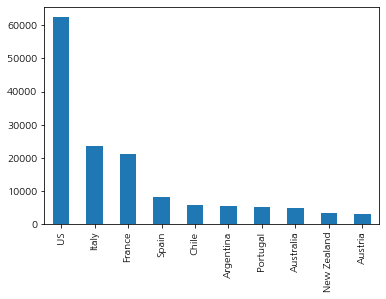

In [7]:
# bar plot
df_original['country'].value_counts().head(10).plot.bar()

plt.show()

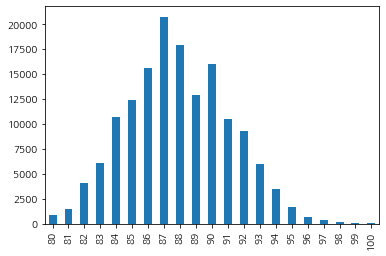

In [8]:
df_original['points'].value_counts().sort_index().plot.bar()

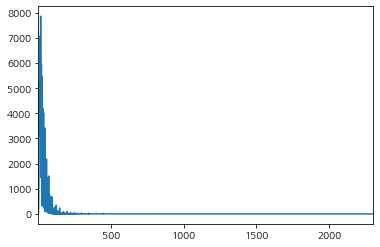

In [9]:
#Plot Price
df_original['price'].value_counts().sort_index().plot.line()

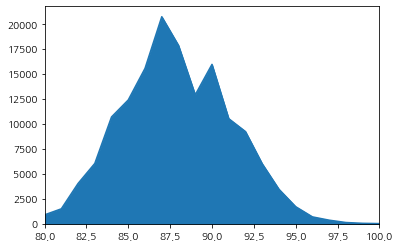

In [10]:
df_original['points'].value_counts().sort_index().plot.area()

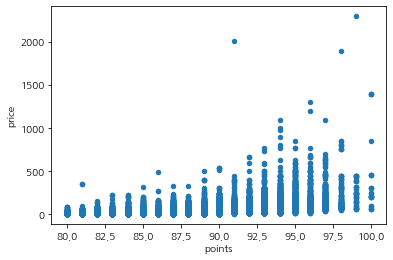

In [11]:
#Scatter Plot
df_original.plot.scatter(x='points', y='price')

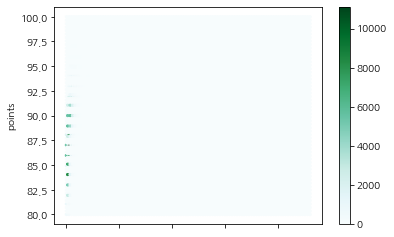

In [12]:
df_original.plot.hexbin(x='price', y='points')

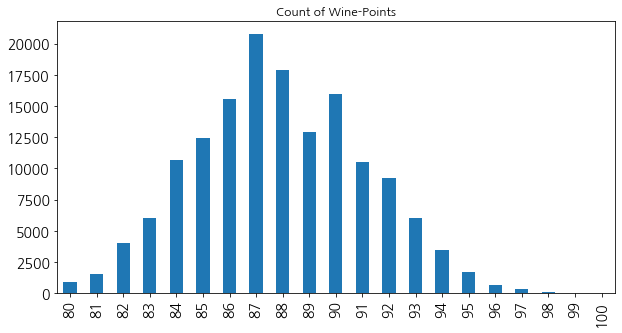

In [13]:
# Figsize argument
df_original['points'].value_counts().sort_index().plot.bar(
    figsize = (10,5),
    fontsize = 14,
    title = "Count of Wine-Points"
)

Text(0, 0.5, 'Count')

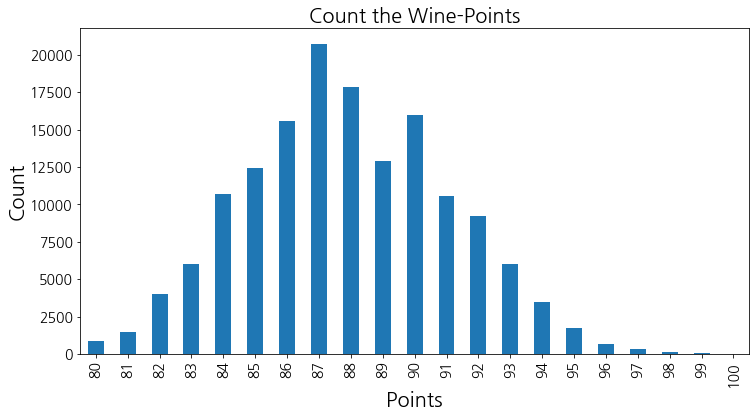

In [14]:
#Adjusting title fontsize using Matplotlib
import matplotlib as mlt

ax = df_original['points'].value_counts().sort_index().plot.bar(
    figsize = (12,6),
    fontsize = 14
)
ax.set_title("Count the Wine-Points", fontsize = 20)
ax.set_xlabel("Points", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)

Text(0.5, 1.0, 'No of Wines from Winery')

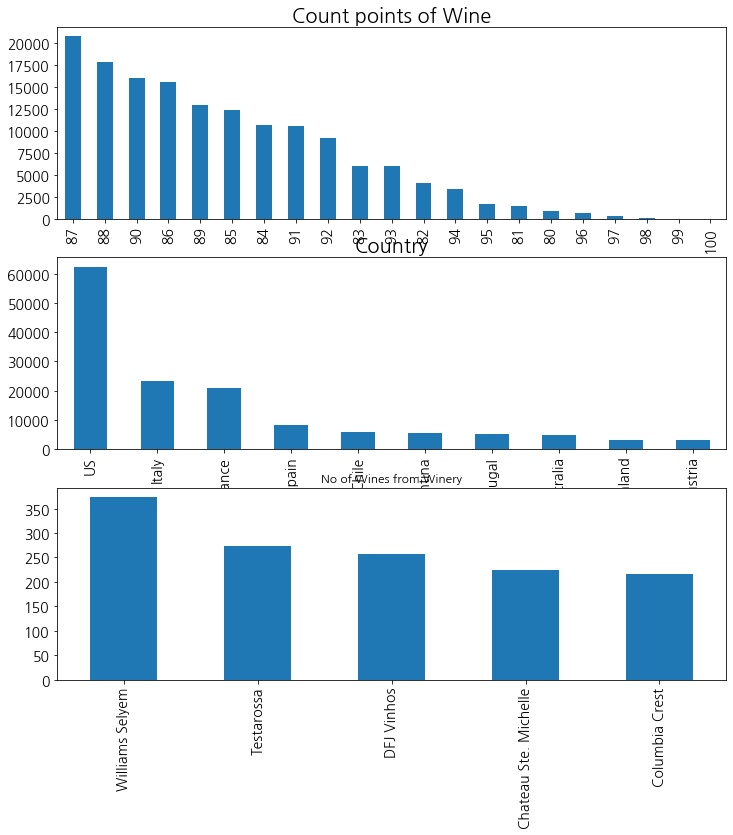

In [15]:
import matplotlib.pyplot as plt
#Creating a frame of rows and columns to place the plots
fig, axi = plt.subplots(3,1, figsize = (12,12))
#plot1
df_original['points'].value_counts().plot.bar(
    ax = axi[0],
    fontsize = 14    
)
axi[0].set_title("Count points of Wine", fontsize = 20)
#Plot2
df_original['country'].value_counts().head(10).plot.bar(
    ax = axi[1],
    fontsize = 14
)
axi[1].set_title('Country', fontsize = 20)
#plot3
df_original['winery'].value_counts().head().plot.bar(
    ax = axi[2],
    fontsize = 14
)
axi[2].set_title("No of Wines from Winery")

In [16]:
df_original.isnull().count()

country        150930
description    150930
designation    150930
points         150930
price          150930
province       150930
region_1       150930
region_2       150930
variety        150930
winery         150930
dtype: int64

# Exploring with *seaborn* package

In [17]:
 import seaborn as sns

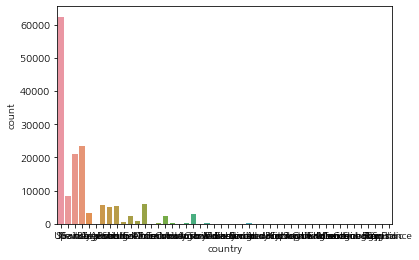

In [18]:
sns.countplot(df_original['country'])

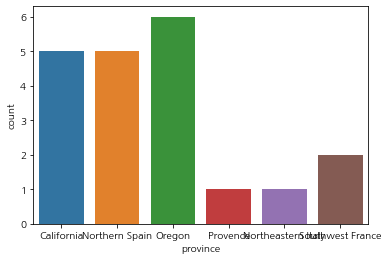

In [19]:
sns.countplot(df_original['province'].head(20))

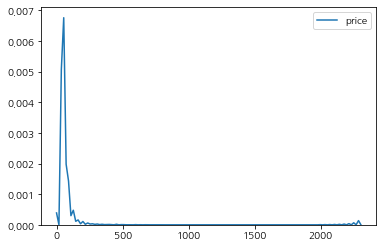

In [20]:
sns.kdeplot(df_original['price'])

Text(0.5, 1.0, 'Price of Wine')

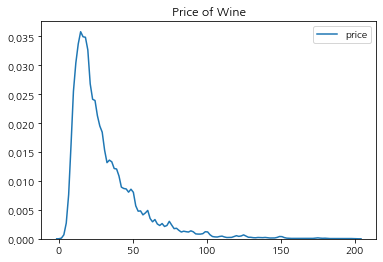

In [21]:
ax = sns.kdeplot(df_original.query('price < 200').price)
ax.set_title("Price of Wine")

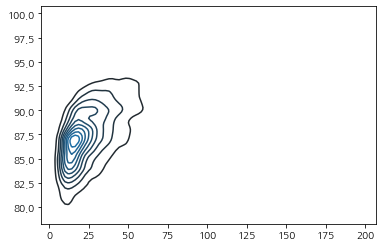

In [22]:
#KDE 2D plot
sns.kdeplot(df_original[df_original['price']< 200].loc[:,['price', 'points']].dropna().sample(5000))

# Histogram plot in *Seaborn*


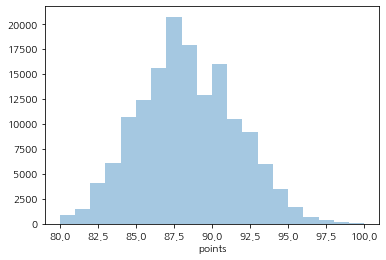

In [23]:
ax = sns.distplot(df_original['points'], bins = 20, kde = False)

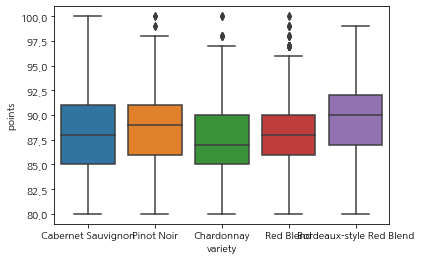

In [24]:
df1= df_original[df_original.variety.isin(df_original.variety.value_counts().head(5).index)]

sns.boxplot(
    x = 'variety',
    y = 'points',
    data = df1
)

# Facet Grid

In [25]:
df_original.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


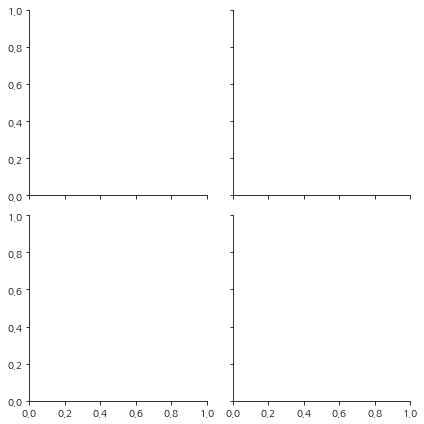

In [32]:
#Extract wine scores from two countries US and France
df_country = df_original[df_original['country'].isin(['US','France', 'Canada', 'Spain'])]
#sns.FacetGrid(df_country, col = "country", col_wrap = 2)

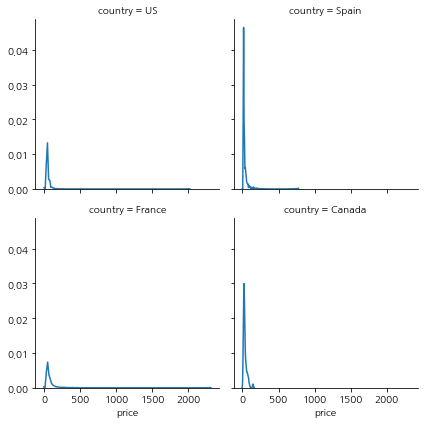

In [37]:
g = sns.FacetGrid(df_country, col = "country", col_wrap = 2)
g.map(sns.kdeplot, "price")

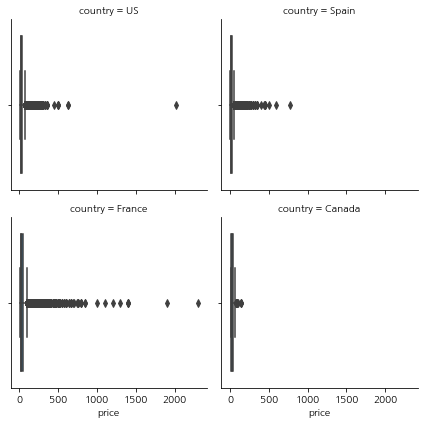

In [34]:
g = sns.FacetGrid(df_country, col = "country", col_wrap = 2)
g.map(sns.boxplot, "price")

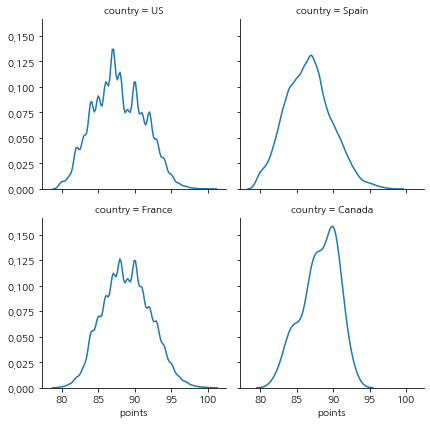

In [35]:
g = sns.FacetGrid(df_country, col = "country", col_wrap = 2)
g.map(sns.kdeplot, "points")

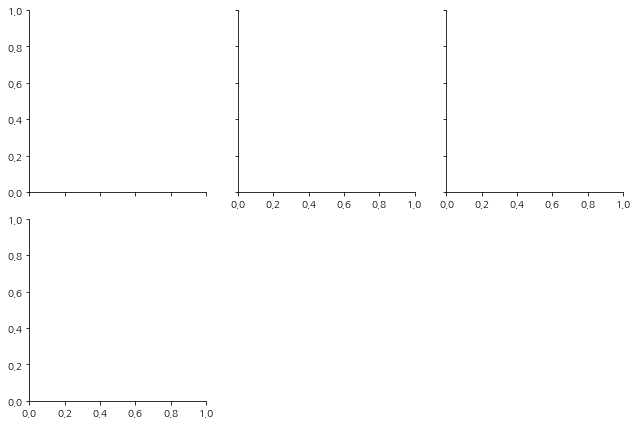

In [36]:
#import matplotlib.pyplot as plt

#g = sns.FacetGrid(df_country, col = "country", col_wrap = 3)